In [1]:
import pandas as pd
import numpy as np
import string
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from matplotlib.pyplot import imread
from wordcloud import WordCloud
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split



In [2]:
#load data
musk=pd.read_csv('Elon_musk.csv', sep=',', encoding='latin-1', index_col=0)
musk

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
musk['Text'].value_counts()

The most entertaining outcome is the most likely                                                                                                    2
@westcoastbill Indeed                                                                                                                               2
@pcgamer But it is visually stunning &amp; playability is good                                                                                      1
@ArtifactsHub That species has stood the test of time                                                                                               1
Starship SN9 &amp; SN10 https://t.co/urtPJn7amo                                                                                                     1
                                                                                                                                                   ..
Dragon can also hover &amp; land propulsively, but we use the parachutes for maximum safety https://

In [4]:
train,test = train_test_split(musk,test_size=0.1)

In [5]:
train

,Text
179,Bought a hand knit wool Marvin the Martian hel...
398,@Erdayastronaut @teslaownersSV Sure
177,@AdamHoov Yes
1063,@alex_avoigt @mike_zimon @WholeMarsBlog That l...
306,@Erdayastronaut @lexfridman Or at least the op...
...,...
711,@michaelmina_lab It would be great if labs cou...
1045,"@PicklePunchD @PPathole @TashaARK Yes, we will..."
1696,RT @NASA: They're coming home! <U+0001F30E><U+...
1284,@jackfarrington For sure


In [6]:
test

,Text
799,@PPathole @cleantechnica Version 1 is about a ...
1770,"RT @teslacn: Pick up the energetic wallpapers,..."
1175,@ArtifactsHub That species has stood the test ...
1539,@Booster_Buddies @NASASpaceflight My button-tw...
304,@engineers_feed His sick beats https://t.co/8P...
...,...
224,Battery cell production is the fundamental rat...
1767,@YourAnonNews You dropped this
380,@PPathole @WSJ Absolutely
811,"@Nereide Faraday invented the electric motor, ..."


In [7]:
import re

# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

# Clean The Text
musk["Text"] = musk["Text"].apply(cleantext)

musk.head()


,Text
1,Im an alien
2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
3,Great interview!
4,Doge is underestimated
5,Congratulations Tesla China for amazing execu...


In [8]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
musk[["subjectivity", "polarity"]] = musk.apply(sentiment_analysis, axis=1)
musk


,Text,subjectivity,polarity
1,Im an alien,0.750000,-0.250000
2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
3,Great interview!,0.750000,1.000000
4,Doge is underestimated,0.000000,0.000000
5,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...
1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1997,Samwise Gamgee,0.000000,0.000000
1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


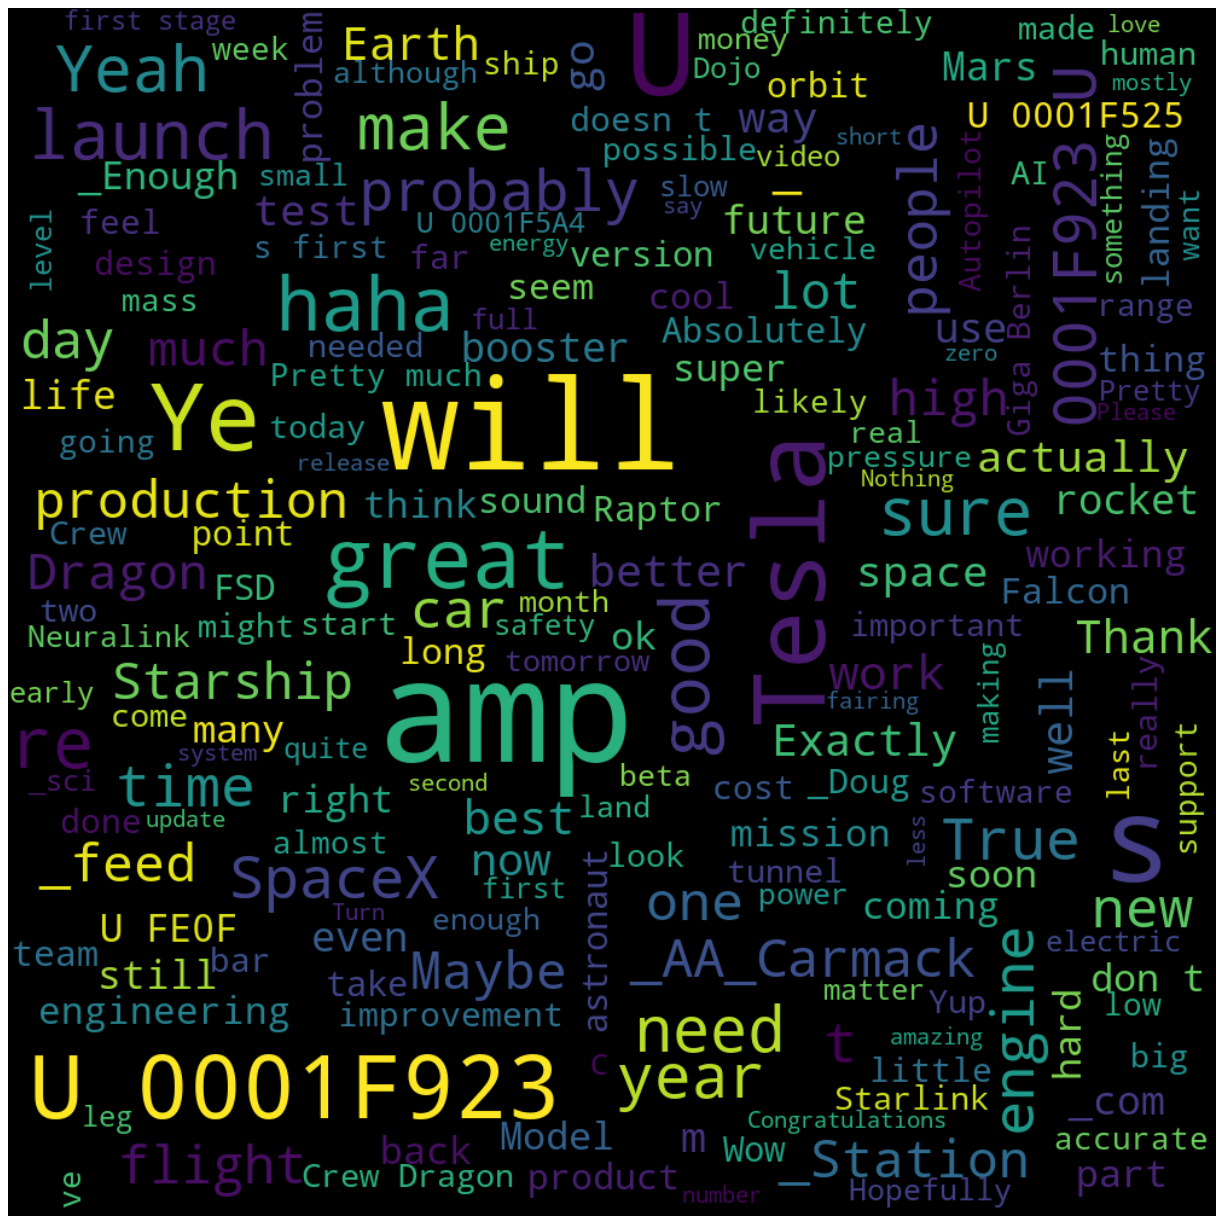

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in musk["Text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


In [10]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"



In [11]:
# Create a New Analysis Column
musk["analysis"] = musk["polarity"].apply(analysis)

In [12]:
musk

,Text,subjectivity,polarity,analysis
1,Im an alien,0.750000,-0.250000,Negative
2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
3,Great interview!,0.750000,1.000000,Positive
4,Doge is underestimated,0.000000,0.000000,Neutral
5,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...
1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1997,Samwise Gamgee,0.000000,0.000000,Neutral
1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


In [13]:
positive_tweets = musk[musk['analysis'] == 'Positive']
negative_tweets = musk[musk['analysis'] == 'Negative']

In [14]:
print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Text'])


positive tweets
 -  Great interview!
 - Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
 -Happy New Year of the Ox! 
 -_   Haha thanks :)
 -The most entertaining outcome is the most likely
negative tweets
 - Im an alien
 - Your app sucks
 - _ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don 
 - _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or 
 - Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

Thats what youre missing.


In [15]:
musk = musk[['Text','analysis']]
musk

,Text,analysis
1,Im an alien,Negative
2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,Neutral
3,Great interview!,Positive
4,Doge is underestimated,Neutral
5,Congratulations Tesla China for amazing execu...,Positive
...,...,...
1995,"True, it sounds so surreal, but the negative ...",Positive
1996,Make sure to read ur terms &amp; conditions b...,Positive
1997,Samwise Gamgee,Neutral
1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,Negative


In [16]:
musk = musk [musk ['analysis']!= 'Neutral']

In [17]:
musk

,Text,analysis
1,Im an alien,Negative
3,Great interview!,Positive
5,Congratulations Tesla China for amazing execu...,Positive
6,Happy New Year of the Ox!,Positive
8,_ Haha thanks :),Positive
...,...,...
1990,"Sorry, should hopefully be soon!",Negative
1992,"No easy way to answer this in a tweet, but he...",Positive
1995,"True, it sounds so surreal, but the negative ...",Positive
1996,Make sure to read ur terms &amp; conditions b...,Positive


In [18]:
train,test = train_test_split(musk,test_size=0.1)

In [19]:
for val in train['Text']:
    print (val)

  Haha
_nafnlaus   _Station Reality looks like a strange ghost-world at radar wavelengths. 
  For a second there, I thought that was a pic of Thanos haha
 Exactly
_miloslav Great nails &amp; lipstick
   Legs would certainly work, but best part is no part, best step is no step
We intend to increase, not reduce battery cell purchases from Panasonic, LG &amp; CATL (possibly other partners too). H 
   Minor
 True. Also, fewer heart attacks, as way easier to pump blood in 37% gravity.
__surfer Im pretty sure Tesla could do a much better autocorrect. The bar is so low haha.
Just kidding, who needs a safe word anyway!?
 Great game
 _Ryan A little
  Sure
 Yes, and then Occams razor is actually third most likely
 _      Glad Jen is safe!
_Hurley   Uh  Chad wtf
 Interesting
_Enough   Autopilot was trapped in a local maximum, labeling single camera images uncorrelate 
 Nobody would suggest buying airplanes that only fly once &amp; then crash into the ocean. That would be absurd 
  One day 

In [20]:
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [23]:
pattern = "(#\w+)|(RT\s@\w+:)|(http.*)|(@\w+)"

In [24]:
train['Text'][1000]

' Limited FSD beta releasing on Tuesday next week, as promised. This will, at first, be limited to a s\x85 '

In [25]:
def Clean_Text(musk):
    Text = []
    analysis = []
    for index,row in musk.iterrows():
        sentence = re.sub(pattern,'',row.Text)
        words = [e.lower() for e in sentence.split()]
        words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
        words = ' '.join(words)
        Text.append(words)
        analysis.append(row.analysis)
    return Text,analysis

In [27]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [28]:
train_Text,train_analysis = Clean_Text(train)

In [29]:
final_data = {'tweets':train_Text,'sentiments':train_analysis}
final_data


{'tweets': ['haha',
  '_nafnlaus _station reality look like strange ghost-world radar wavelengths.',
  'second there, thought pic thanos haha',
  'exactly',
  '_miloslav great nail &amp; lipstick',
  'leg would certainly work, best part part, best step step',
  'intend increase, reduce battery cell purchase panasonic, lg &amp; catl (possibly partner too). h',
  'minor',
  'true. also, fewer heart attacks, way easier pump blood 37% gravity.',
  '__surfer i\x92m pretty sure tesla could much better autocorrect. bar low haha.',
  'kidding, need safe word anyway!?',
  'great game',
  '_ryan little',
  'sure',
  'yes, occam\x92s razor actually third likely',
  '_ glad jen safe!',
  '_hurley uh chad wtf',
  'interesting',
  '_enough autopilot trapped local maximum, labeling single camera image uncorrelate',
  'nobody would suggest buying airplane fly &amp; crash ocean. would absurd',
  'one day fly starship',
  ': falcon 9 booster supporting mission previously launched astronaut bob behnken d

In [30]:
processed_data = pd.DataFrame(final_data)

In [31]:
processed_data

,tweets,sentiments
0,haha,Positive
1,_nafnlaus _station reality look like strange g...,Negative
2,"second there, thought pic thanos haha",Positive
3,exactly,Positive
4,_miloslav great nail &amp; lipstick,Positive
...,...,...
987,great work tesla software engineering,Positive
988,amazing see operation! biggest casting machine...,Positive
989,"_afshari general, need improve podcasts play",Positive
990,misperception. spacex developed &amp; continue...,Positive


In [32]:
# Label Encoding:

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
processed_data['sentiments'] = labelencoder.fit_transform(processed_data['sentiments'])


In [34]:
processed_data

,tweets,sentiments
0,haha,1
1,_nafnlaus _station reality look like strange g...,0
2,"second there, thought pic thanos haha",1
3,exactly,1
4,_miloslav great nail &amp; lipstick,1
...,...,...
987,great work tesla software engineering,1
988,amazing see operation! biggest casting machine...,1
989,"_afshari general, need improve podcasts play",1
990,misperception. spacex developed &amp; continue...,1


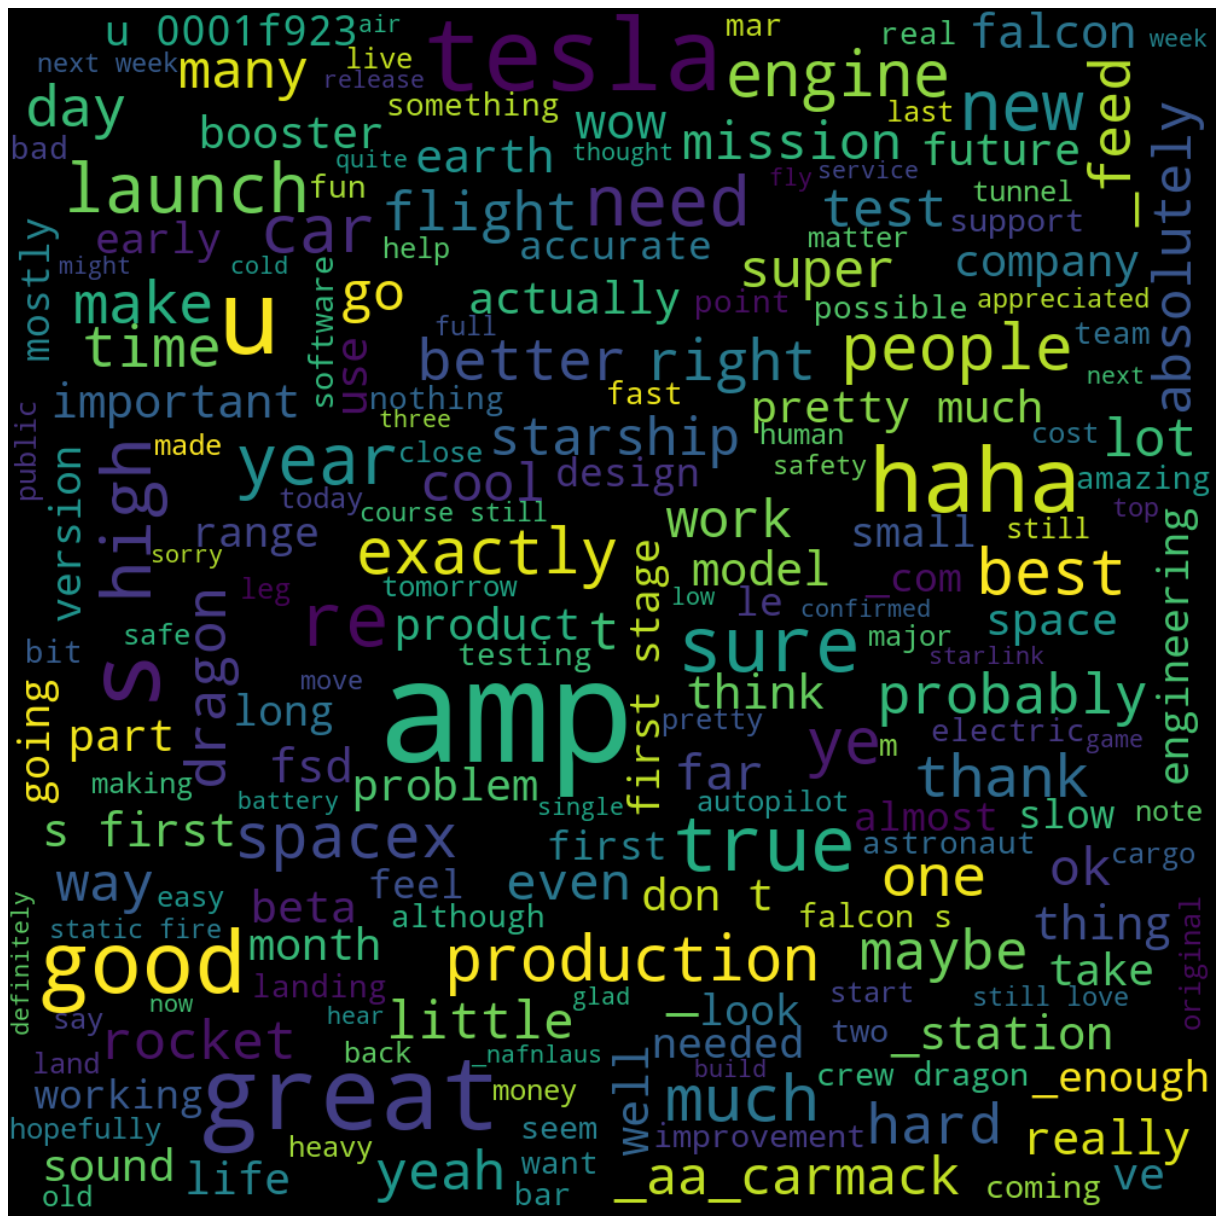

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in processed_data["tweets"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()



C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiments', ylabel='Density'>

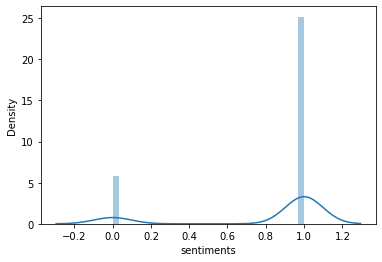

In [36]:
sns.distplot(processed_data['sentiments'])

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3))
cv.fit(processed_data['tweets'])


CountVectorizer(ngram_range=(1, 3))

In [39]:
X_train = cv.transform(processed_data['tweets'])

In [40]:
print(X_train.shape)

(992, 13100)


In [41]:
X_train

<992x13100 sparse matrix of type '<class 'numpy.int64'>'
	with 17674 stored elements in Compressed Sparse Row format>

In [42]:
target = processed_data['sentiments'].values

In [43]:
target

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [44]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [45]:
classifier.fit(X_train,target)

MultinomialNB()

In [46]:
test_Text,test_analysis = Clean_Text(test)

In [47]:
data_test = {'tweets':test_Text,'sentiments':test_analysis}
final_test_data = pd.DataFrame(data_test)

In [48]:
final_test_data

,tweets,sentiments
0,beautiful day la,Positive
1,"yeah, feel pretty normal. symptom right now. l...",Positive
2,were switching sensible fsd version numbering...,Positive
3,three static fire completed &amp; ruds!,Positive
4,"likely, flap fold landing reduce wind tip force.",Positive
...,...,...
106,firmware probably slightly accurate descriptio...,Positive
107,still soft spot heart transpiration cooking. t...,Positive
108,number pcr amplification cycle required detect...,Negative
109,"its still there, focus vega &amp; prufrock, n...",Positive


In [49]:
X_test = cv.transform(final_test_data['tweets'])

In [50]:
X_test

<111x13100 sparse matrix of type '<class 'numpy.int64'>'
	with 683 stored elements in Compressed Sparse Row format>

In [51]:
X_test.shape

(111, 13100)

In [52]:
y_pred = classifier.predict(X_test)
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [53]:
final_test_data['sentiments'] = labelencoder.fit_transform(final_test_data['sentiments'])

In [54]:
final_test_data

,tweets,sentiments
0,beautiful day la,1
1,"yeah, feel pretty normal. symptom right now. l...",1
2,were switching sensible fsd version numbering...,1
3,three static fire completed &amp; ruds!,1
4,"likely, flap fold landing reduce wind tip force.",1
...,...,...
106,firmware probably slightly accurate descriptio...,1
107,still soft spot heart transpiration cooking. t...,1
108,number pcr amplification cycle required detect...,0
109,"its still there, focus vega &amp; prufrock, n...",1


In [55]:
actual_values = final_test_data['sentiments'].values    

In [56]:
actual_values

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0])

In [58]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, actual_values))

0.7117117117117117
